In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
val = pd.read_csv('data/udr-large-081815/validation_log_0.csv', delimiter='\t')
test = np.load('figs/result1.npy')

In [20]:
x = np.arange(7200, 302400, 7200)

In [21]:
x.shape

(41,)

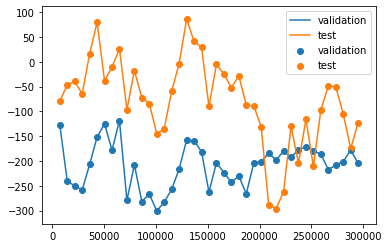

In [23]:
plt.plot(x, val['mean_validation_reward'][:-1], label="validation")
plt.plot(x, test, label="test")
plt.scatter(x, val['mean_validation_reward'][:-1], label="validation")
plt.scatter(x, test, label="test")
plt.legend()